# Ensemble modelling

In [1]:
import pandas as pd
import numpy as np

In [15]:
train = pd.read_csv('df1_train_imputed_feature_engineeredV1.csv')
test = pd.read_csv('df1_test_imputed_feature_engineered.csv')
submission =pd.read_csv('submission12.csv')
train1 = pd.read_csv('train_imputed_missing.csv')

In [8]:
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

<AxesSubplot:>

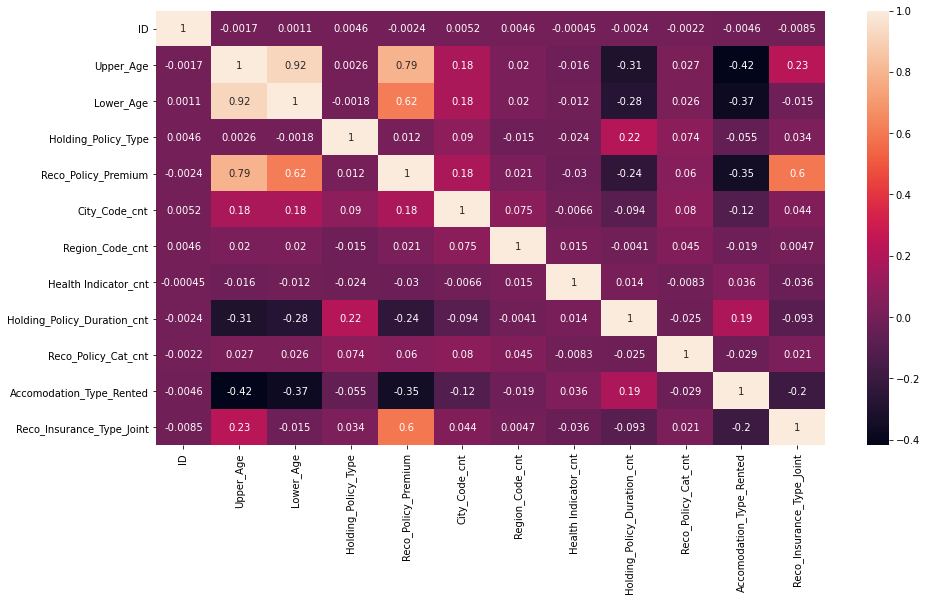

In [10]:
# Correlation for imputed values dataset
corr=train.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(15,8))
sns.heatmap(train[top_features].corr(),annot=True)

In [12]:
# Set Correlation threshold as abs(.80)
threshold=0.8

# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr



In [21]:
train.head()

,ID,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Premium,City_Code_cnt,Region_Code_cnt,Health Indicator_cnt,Holding_Policy_Duration_cnt,Reco_Policy_Cat_cnt,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes
0,1,36,36,3.0,11628.0,6954,10,35342,6227,9459,1,0,0
1,2,75,22,3.0,30510.0,1963,21,14848,35244,9459,0,1,0
2,3,32,32,1.0,7450.0,1963,8,35342,35244,5319,0,0,0
3,4,52,48,3.0,17780.0,823,5,35342,6227,5319,0,1,0
4,5,44,44,1.0,10404.0,2579,14,14848,5192,5786,1,0,0


In [20]:
correlation(train,threshold)

{'Is_Spouse_Yes', 'Lower_Age'}

In [ ]:
X = train.drop(['ID','Is_Spouse_Yes', 'Lower_Age'], axis=1)
y = train1['Response']

### Information Gain

In [22]:
X = train.drop(['ID'], axis=1)
y = train1['Response']

In [23]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,y)
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

Reco_Policy_Cat_cnt            0.025044
Holding_Policy_Type            0.004988
Health Indicator_cnt           0.004334
Reco_Policy_Premium            0.004283
Is_Spouse_Yes                  0.003769
Holding_Policy_Duration_cnt    0.003250
Accomodation_Type_Rented       0.001314
Reco_Insurance_Type_Joint      0.000784
Region_Code_cnt                0.000246
Lower_Age                      0.000135
City_Code_cnt                  0.000000
Upper_Age                      0.000000
dtype: float64

#### CIty_Code_cnt and Upper age no information gain

## Feature Importance

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif
ordered_rank_features=SelectKBest(f_classif, k=4)
ordered_feature=ordered_rank_features.fit(X,y)
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,Upper_Age,0.391031
1,Lower_Age,0.224110
2,Holding_Policy_Type,1.960802
3,Reco_Policy_Premium,3.210601
4,City_Code_cnt,3.843858
5,Region_Code_cnt,0.186344
6,Health Indicator_cnt,0.090117
7,Holding_Policy_Duration_cnt,5.137765
8,Reco_Policy_Cat_cnt,196.354557
9,Accomodation_Type_Rented,1.376414


In [25]:
features_rank.nlargest(10,'Score')

,Features,Score
8,Reco_Policy_Cat_cnt,196.354557
7,Holding_Policy_Duration_cnt,5.137765
10,Reco_Insurance_Type_Joint,4.978498
4,City_Code_cnt,3.843858
3,Reco_Policy_Premium,3.210601
2,Holding_Policy_Type,1.960802
9,Accomodation_Type_Rented,1.376414
11,Is_Spouse_Yes,0.757694
0,Upper_Age,0.391031
1,Lower_Age,0.224110


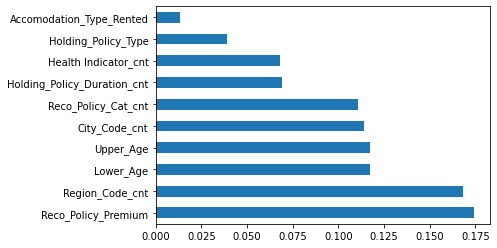

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
y=y.astype('int')
model=ExtraTreesClassifier()
model.fit(X,y)
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [27]:
X = train.drop(['ID', 'Lower_Age'], axis=1)
y = train1['Response']

In [ ]:
# RF

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


# Logistic Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)
from sklearn.preprocessing import StandardScaler #but to visalize with high reolution(0.01),feature scaling helps to execute lot faster
sc = StandardScaler()   
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
log_classifier.fit(X_train_scaled, y_train)
ytrain_pred = log_classifier.predict_proba(X_train_scaled)


# Logistic with iteration
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression(solver='lbfgs',max_iter=10000)
sc = StandardScaler()   
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
log_classifier.fit(X_train_scaled, y_train)


# Adaptive Boost classifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)

# KNN
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)
#Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)


# Naive Bayes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Catboost Classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)
import catboost as cb
cb_classifier = cb.CatBoostClassifier()
cb_classifier.fit(X_train, y_train)


# Light Gradient Boost
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)
import lightgbm as lgb
from sklearn import metrics
lg = lgb.LGBMClassifier(silent=False)
lg.fit(X_train,y_train)


# Extreme Gradient Boost
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)
import xgboost as xgb
from sklearn import metrics
# Parameter Tuning
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)

# Decision Tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)
# Fitting Decision Tree to the Training set
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, y_train)


# Support Vector Classification
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
# Fitting Kernel SVM classifier to the Training set
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf', random_state = 0, probability=True) #rbf is gaussian kernel
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
svc_classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
model_metrics=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier, gnb,cb_classifier,lg,xg,dt_classifier,svc_classifier]:
    results = classificatop(model, X_train, y_train, scoring=scoring)
    model_metrics.append(pd.DataFrame(model.roc_curve(y_test,xg.predict_proba(X_test)[:,1] ,))
final_prediction=pd.concat(model_metrics,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

In [ ]:
ensemble_pred = pd.concat(pred,axis=1)

In [ ]:
ensemble_pred = ensemble_pred.rename(columns = {0:'RF',1:'LogReg', 2:'AdaBoost',3:'KNN',4:'NaiveBayes', 5:'CatBoost',6:'LGBM', 7:'XGBM', 8:'DecisionTree',9:'SupportVector'})

### Make the model metrics dataframe

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
model_metrics=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier, gnb,cb_classifier,lg,xg,dt_classifier,svc_classifier]:
    results = classificatop(model, X_train, y_train, scoring=scoring)
    model_metrics.append(pd.DataFrame(model.roc_curve(y_test,xg.predict_proba(X_test)[:,1] ,))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))